In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'wonders-of-the-world-image-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2144356%2F3569211%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240913%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240913T001433Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0d79992096aad8ed044ea72f0f8c4dc4134ab485547aa96f23b0ae617e2762314c7567697de9ce0b417f7702d8b900d68ac79d3dc99c8d911130c2bead36782098c6f52ce27fdb1a39873f9df125cfa14d157e4046c7cb9db8dfaf42dac26bcd37700e2ea2287fecfccadec6292c7b62b5e058c3801ce5834faeee091ba89b9e2b1b8b90cd629ac696c5d46da39fe508f3a6ff13bbefb95030c0ad5b79abdf37b263090aa345d72c9816f97402b582276739bcb53002265dde006f5b12cb81f9ca6c1eb2dec4ff8f53fd04f4fa3874415f5275f4e47c6e9fffb6b1e6e256a96038ebc70ce4f6c5af32bad376e174ccd57ebdc7df10ba8fb78b9e9716285cb0c7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 453078359 bytes downloaded
Downloaded and uncompressed: wonders-of-the-world-image-classification
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wonders-of-the-world-image-classification/wonders_of_world_images.csv
/kaggle/input/wonders-of-the-world-image-classification/Wonders of World/Wonders of World/great_wall_of_china/7b95db879e.jpg
/kaggle/input/wonders-of-the-world-image-classification/Wonders of World/Wonders of World/great_wall_of_china/67c54c43fe.jpg
/kaggle/input/wonders-of-the-world-image-classification/Wonders of World/Wonders of World/great_wall_of_china/35d15499b2.jpg
/kaggle/input/wonders-of-the-world-image-classification/Wonders of World/Wonders of World/great_wall_of_china/61aa4144a4.jpg
/kaggle/input/wonders-of-the-world-image-classification/Wonders of World/Wonders of World/great_wall_of_china/66eb0f0562.jpg
/kaggle/input/wonders-of-the-world-image-classification/Wonders of World/Wonders of World/great_wall_of_china/1fd912db0f.jpg
/kaggle/input/wonders-of-the-world-image-classification/Wonders of World/Wonders of World/great_wall_of_china/3d09f12361.jpg
/kaggle/input/wonders-of-the-world-image-

In [ ]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Prevent annoying tensorflow warning
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

import warnings
warnings.simplefilter("ignore")

# Set pandas options correctly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)

In [ ]:
sdir=r'../input/wonders-of-the-world-image-classification/Wonders of World/Wonders of World'
ht=0
wt=0
samples=0
sample_count=10
filepaths=[]
labels=[]
classlist=os.listdir(sdir)
for klass in classlist:
    classpath=os.path.join(sdir, klass)
    flist=os.listdir(classpath)
    for i, f in enumerate(flist):
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        labels.append(klass)
        #  get image shape to use for averaging of image shapes
        if i < sample_count:
            img=plt.imread(fpath)
            ht += img.shape[0]
            wt += img.shape[1]
            samples +=1
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
class_count= len(df['labels'].unique())
print('The dataframe has ', class_count, ' classes')
# split df into train_df, test_df and valid_df
train_df, dummy_df=train_test_split(df, train_size=.8, shuffle=True, random_state=123, stratify=df['labels'])
valid_df, test_df = train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels'])
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
classes=list(train_df['labels'].unique())
class_count = len(classes)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
for label in train_df['labels'].unique():
      group=groups.get_group(label)
      print('{0:^30s} {1:^13s}'.format(label, str(len(group))))
wave=wt/samples
have=ht/samples
aspect_ratio= have/wave
print ('Average Image Height: ' ,have, '  Average Image Width: ', wave, '  Aspect ratio: ', aspect_ratio)

The dataframe has  12  classes
train_df lenght:  3076   test_df length:  385   valid_df length:  385
            CLASS               IMAGE COUNT 
      statue_of_liberty             190     
     great_wall_of_china            314     
    venezuela_angel_falls           201     
         machu_pichu                314     
     christ_the_reedemer            258     
       roman_colosseum              315     
         chichen_itza               272     
       pyramids_of_giza             298     
          taj_mahal                 126     
         burj_khalifa               312     
          stonehenge                163     
         eiffel_tower               313     
Average Image Height:  467.8666666666667   Average Image Width:  607.5833333333334   Aspect ratio:  0.7700452612810313


In [ ]:
def trim (df, max_size, min_size, column):
    df=df.copy()
    original_class_count= len(list(df[column].unique()))
    sample_list=[]
    groups=df.groupby(column)
    for label in df[column].unique():
        group=groups.get_group(label)
        sample_count=len(group)
        if sample_count> max_size :
            strat=group[column]
            samples,_=train_test_split(group, train_size=max_size, shuffle=True, random_state=123, stratify=strat)
            sample_list.append(samples)
        elif sample_count>= min_size:
            sample_list.append(group)
    df=pd.concat(sample_list, axis=0).reset_index(drop=True)
    final_class_count= len(list(df[column].unique()))
    if final_class_count != original_class_count:
        print ('*** WARNING***  dataframe has a reduced number of classes from ', original_class_count,' to ', final_class_count )
    groups=df.groupby('labels')
    print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
    for label in train_df['labels'].unique():
          group=groups.get_group(label)
          print('{0:^30s} {1:^13s}'.format(label, str(len(group))))
    return df

In [ ]:
max_samples=150
min_samples=0
column='labels'
train_df=trim(train_df, max_samples, min_samples, column)

            CLASS               IMAGE COUNT 
      statue_of_liberty             150     
     great_wall_of_china            150     
    venezuela_angel_falls           150     
         machu_pichu                150     
     christ_the_reedemer            150     
       roman_colosseum              150     
         chichen_itza               150     
       pyramids_of_giza             150     
          taj_mahal                 126     
         burj_khalifa               150     
          stonehenge                150     
         eiffel_tower               150     


In [ ]:
working_dir=r'./'
img_size=(200,250)
batch_size=40 # We will use and EfficientetB3 model, with image size of (200, 250) this size should not cause resource error
trgen=ImageDataGenerator(horizontal_flip=True,rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2 )
t_and_v_gen=ImageDataGenerator()
train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
# for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
# this insures that we go through all the sample in the test set exactly once.
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
# from the generator we can get information we will need later
classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)
print ('{0:^25s}{1:^12s}'.format('class name', 'class index'))
for klass, index in zip(classes, class_indices):
    print(f'{klass:^25s}{str(index):^12s}')

Found 1776 validated image filenames belonging to 12 classes.
Found 385 validated image filenames belonging to 12 classes.
Found 385 validated image filenames belonging to 12 classes.
test batch size:  77   test steps:  5  number of classes :  12
       class name        class index 
      burj_khalifa            0      
      chichen_itza            1      
   christ_the_reedemer        2      
      eiffel_tower            3      
   great_wall_of_china        4      
       machu_pichu            5      
    pyramids_of_giza          6      
     roman_colosseum          7      
    statue_of_liberty         8      
       stonehenge             9      
        taj_mahal             10     
  venezuela_angel_falls       11     


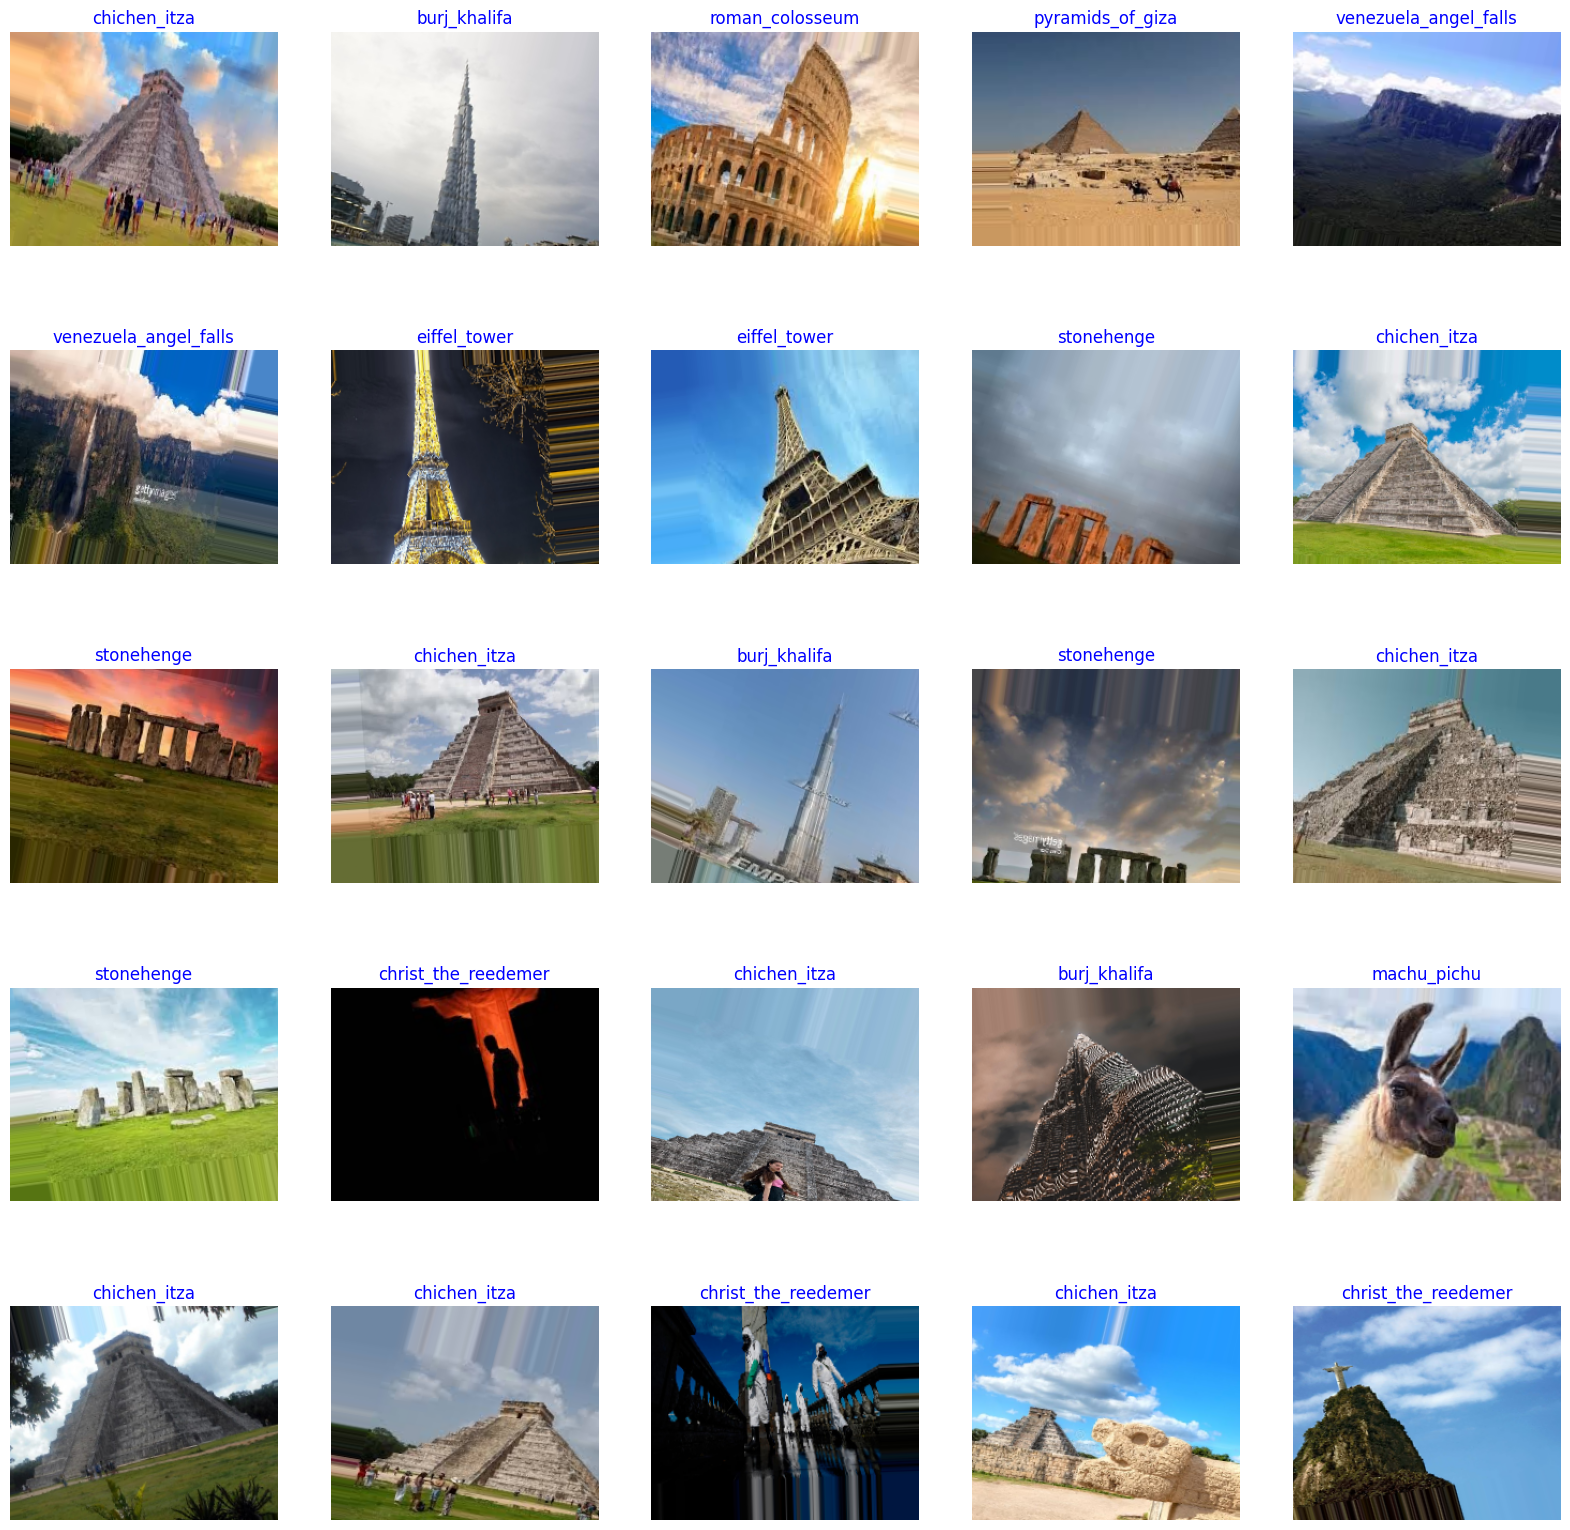

In [ ]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i] /255
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()

show_image_samples(train_gen )

In [ ]:
img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')
# Note you are always told NOT to make the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(1024, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.3, seed=123)(x)
x = Dense(128, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.001 # start with this learning rate
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
class ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(ASK, self).__init__()
        self.model=model
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch

    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0:
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to')
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')
        self.start_time= time.time() # set the time at which training started

    def on_train_end(self, logs=None):   # runs at the end of training
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time

    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()

                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)

In [ ]:
epochs=40
ask_epoch=10
ask=ASK(model, epochs,  ask_epoch)
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2,verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1,restore_best_weights=True)
callbacks=[rlronp, estop, ask]

In [ ]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

Training will proceed until epoch 10  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/40
45/45 [==============================] - 189s 4s/step - loss: 25.2652 - accuracy: 0.5580 - val_loss: 25.1872 - val_accuracy: 0.7740 - lr: 0.0010
Epoch 2/40
45/45 [==============================] - 150s 3s/step - loss: 19.3800 - accuracy: 0.8632 - val_loss: 18.1528 - val_accuracy: 0.9532 - lr: 0.0010
Epoch 3/40
45/45 [==============================] - 150s 3s/step - loss: 15.1293 - accuracy: 0.9229 - val_loss: 13.8256 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 4/40
45/45 [==============================] - 149s 3s/step - loss: 12.1746 - accuracy: 0.9499 - val_loss: 10.9138 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 5/40
45/45 [==============================] - 145s 3s/step - loss: 9.8862 - accuracy: 0.9713 - val_loss: 8.7935 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 6/40
45/45 [==============================] - 149s 3s/

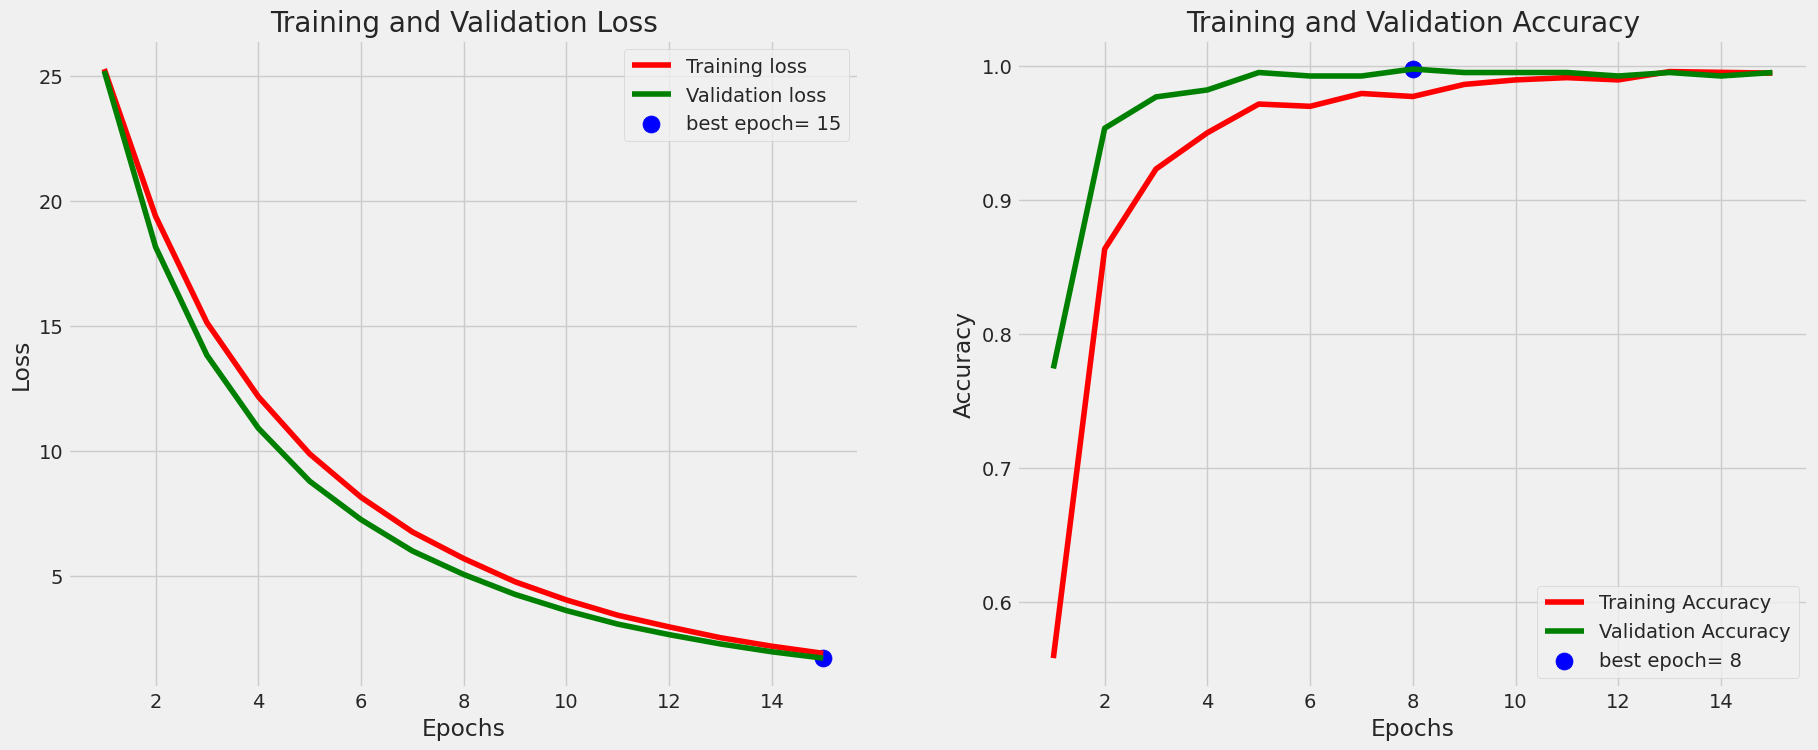

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.show()

tr_plot(history,0)

5/5 [==============================] - 10s 2s/step
there were 8 in 385 tests for an accuracy of  97.92


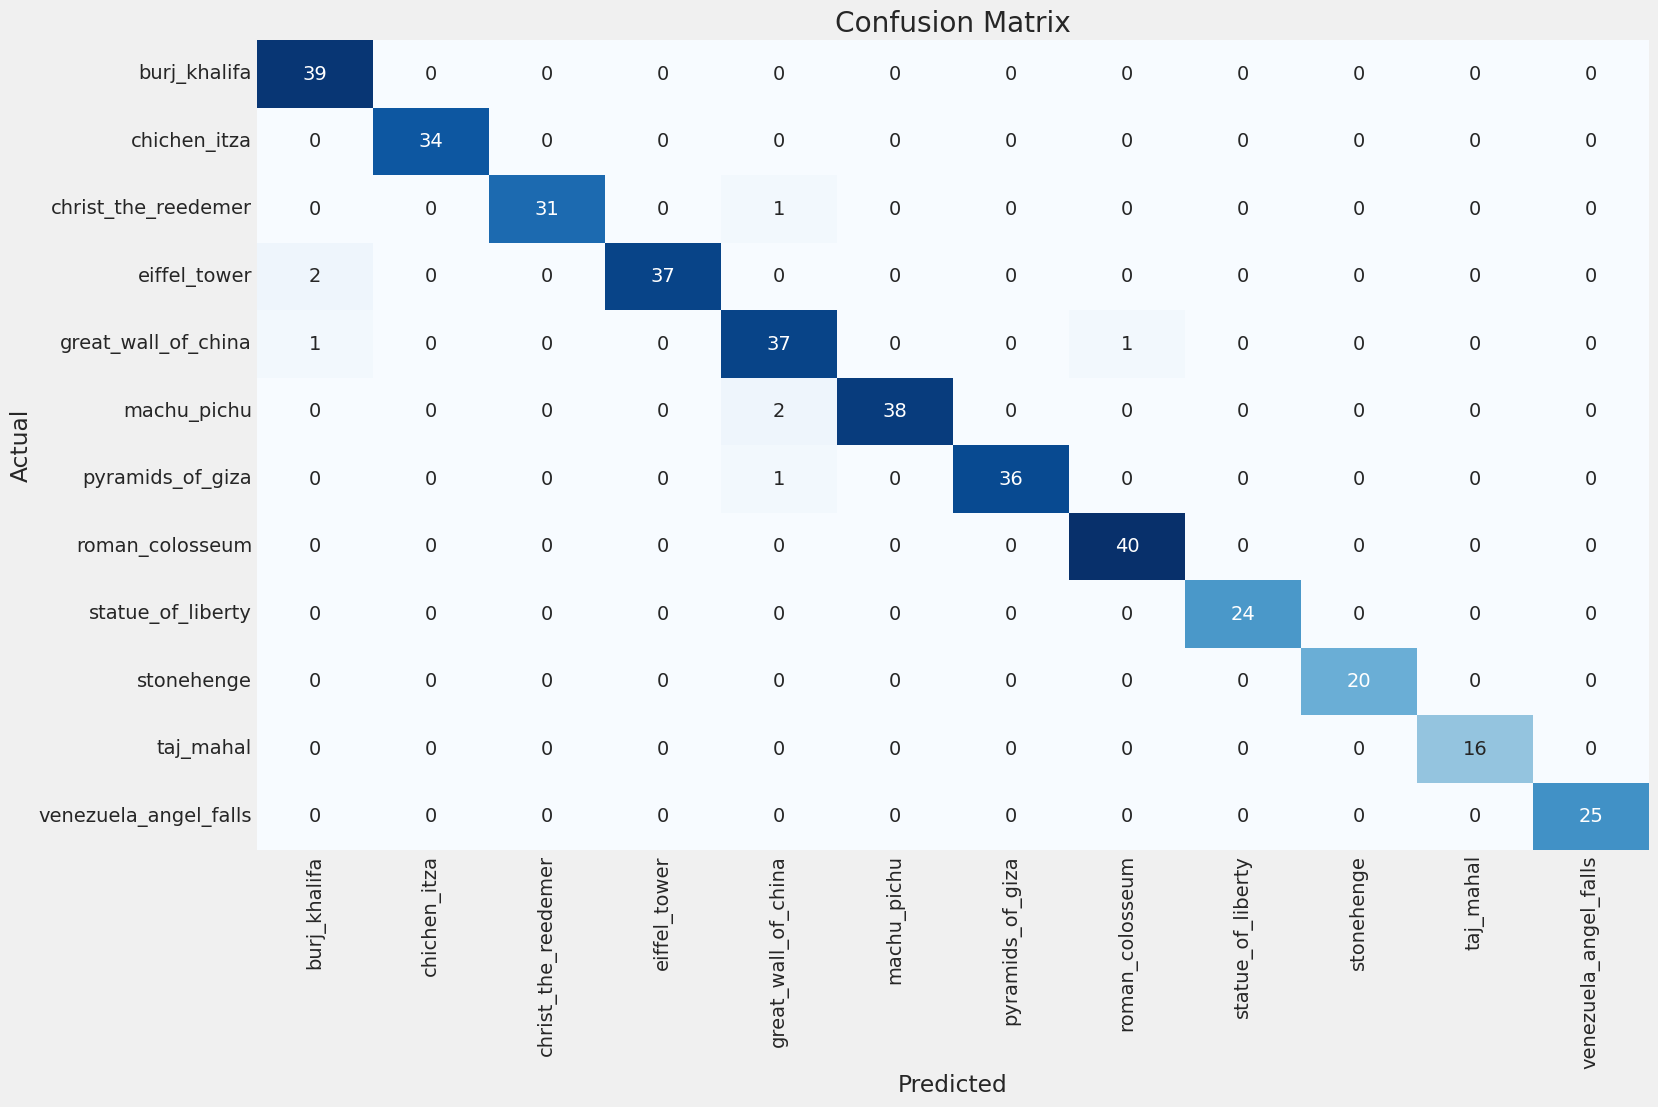

Classification Report:
----------------------
                        precision    recall  f1-score   support

         burj_khalifa     0.9286    1.0000    0.9630        39
         chichen_itza     1.0000    1.0000    1.0000        34
  christ_the_reedemer     1.0000    0.9688    0.9841        32
         eiffel_tower     1.0000    0.9487    0.9737        39
  great_wall_of_china     0.9024    0.9487    0.9250        39
          machu_pichu     1.0000    0.9500    0.9744        40
     pyramids_of_giza     1.0000    0.9730    0.9863        37
      roman_colosseum     0.9756    1.0000    0.9877        40
    statue_of_liberty     1.0000    1.0000    1.0000        24
           stonehenge     1.0000    1.0000    1.0000        20
            taj_mahal     1.0000    1.0000    1.0000        16
venezuela_angel_falls     1.0000    1.0000    1.0000        25

             accuracy                         0.9792       385
            macro avg     0.9839    0.9824    0.9828       385
      

In [ ]:
y_pred= []
y_true=test_gen.labels
errors=0
preds=model.predict(test_gen, steps=test_steps, verbose=1) # predict on the test set
tests=len(preds)
for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=test_gen.labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            errors=errors + 1
        y_pred.append(pred_index)
acc=( 1-errors/tests) * 100
print(f'there were {errors} in {tests} tests for an accuracy of {acc:6.2f}')
ypred=np.array(y_pred)
ytrue=np.array(y_true)
cm = confusion_matrix(ytrue, ypred )
# plot the confusion matrix
plt.figure(figsize=(16, 10))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

In [ ]:
subject='world wonders'
acc=str(( 1-errors/tests) * 100)
index=acc.rfind('.')
acc=acc[:index + 3]
save_id= subject + '_' + str(acc) + '.h5'
model_save_loc=os.path.join(working_dir, save_id)
model.save(model_save_loc)
print ('model was saved as ' , model_save_loc )

model was saved as  ./world wonders_97.92.h5


In [ ]:
from google.colab import files
files.download('./world wonders_97.92.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>